<h1><b>TITANIC SURVIVOR ANALYSIS</b></h1>
<h5>In this project we are going to build an artificial neural network to classify the passangers into two classes based on whether they survived the titanic incident or not.</h5>

In [ ]:
import pandas as pd
import numpy as np

## READING DATA USING PANDAS


We use pandas *read_csv* function to read the csv file in python and pandas *DataFrame* method to convert file into the data frame.

In [ ]:
df = pd.DataFrame(pd.read_csv('train.csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

**Description of the attributes of the dataset**


Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
survival: Survival (0 = No; 1 = Yes)<br>
name: Name<br>
sex: Sex<br>
age: Age<br>
sibsp: Number of Siblings/Spouses Aboard<br>
parch: Number of Parents/Children Aboard<br>
ticket: Ticket Number<br>
fare: Passenger Fare (British pound)<br>
cabin: Cabin<br>
embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>


### HANDELING NULL VALUES

The dataset may contains many rows and columns for which some values are missing, we can't leave those missing values as it is. 
In such cases we have two option:
1. Either drop the entire row or column
2. Fill the missing values with some appropriate value let's say mean of all the values for that column may do the job.


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<b>Seperating out the columns which have more than 35% of the values missing in the dataset</b>

In [ ]:
# df.isnull().sum() returns a pandas series with columns name as the label index
# and total count of null values in the column as it's value
# And we are storing only those columns which have more than 35% of the data missing.

drop_col = df.isnull().sum()[df.isnull().sum()>(35/100 * df.shape[0])]  
drop_col

Cabin    687
dtype: int64

>**NOTE**: There is no specific number after which you should drop the column. It's just that we decided that on our own according to what we want.

In [ ]:
drop_col.index

Index(['Cabin'], dtype='object')

In [ ]:
df.drop(drop_col.index, axis=1, inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
df.fillna(df.mean(), inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Beacause **Embarked** contains string values, we see the details of that column seperately from others as strings does not have mean and all.

In [ ]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

For Embarked attribute, we fill the NULL values with the most frequent value in the column.

In [ ]:
df['Embarked'].fillna('S',inplace=True)  

In [ ]:
df.isnull().sum()          ## NOW ALL THE NULL  VALUES HAVE BEEN FILLED

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

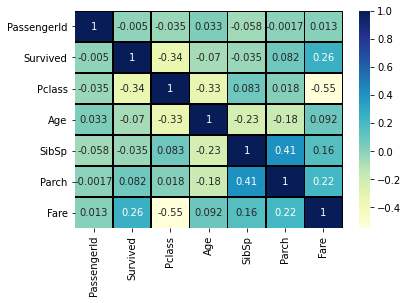

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot = True, cmap="YlGnBu", linecolor='black', linewidths=0.5)

**sibsp**: Number of Siblings/Spouses Aboard<br>
**parch**: Number of Parents/Children Aboard

So we can make a new column family_size by combining these two columns

In [ ]:
df['FamilySize'] = df['SibSp']+df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df[['FamilySize', 'Survived']].corr()

KeyError: 'SibSp'

**FamilySize in the ship does not have much correlance with survival rate**

Let's check if we weather the person was alone or not can affect the survival rate.

In [ ]:
df['Alone'] = [0 if df['FamilySize'][i]>0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [ ]:
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

If the person is alone he/she has less chance of surviving.

> The reason might be the person who is traveling with his family might be belonging to rich class and might be prioritized over other.



In [ ]:
df.groupby('Alone')['Fare'].mean()

Alone
0    48.832275
1    21.242689
Name: Fare, dtype: float64

So we can see the person travelling with their family have higher average ticket price. Means the person with family have high chances of belonging to a rich family.

In [ ]:
df['Sex'] = [0 if df['Sex'][i]=='male' else 1 for i in df.index]  # 1 for female, 0 for male
df.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

It shows, female passengers have more chance of surviving than male ones.

It shows women were prioritized over men.

In [ ]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

<B>[Seaborn's lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html): It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.</B>





c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


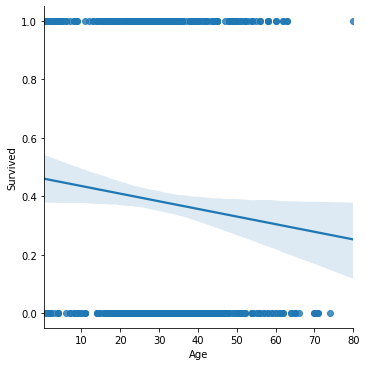

In [ ]:
sns.lmplot('Age','Survived',data=df)

<B>[Seaborn's Voilin Plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html): Draw a combination of boxplot and kernel density estimate.Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.</B>

<AxesSubplot:xlabel='Sex', ylabel='Age'>

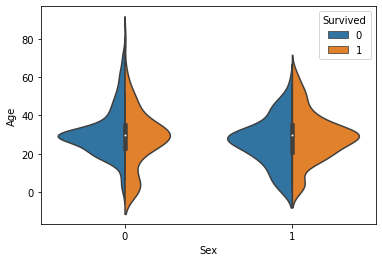

In [ ]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", 
data = df, split = True)

c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


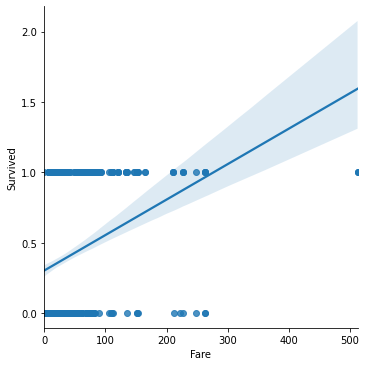

In [ ]:
sns.lmplot('Fare','Survived',data=df)

##**CONCLUSION**

* Female passengers were prioritized over men.
* People with high class or rich people have higher survivl rate than others. The hierarichy might have been followed while saving the passangers.
* Passengers travelling with their family have higher survival rate.
* Passengers who borded the ship at Cherbourg, survived more in proportion then the others.

<b>DROPING UNNECESSARY COLUMNS</b>

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,S,0,1


In [ ]:
df.drop(['Ticket', 'FamilySize', 'Name'], axis = 1, inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,1,0,3,0,22.0,7.2500,S,0
1,2,1,1,1,38.0,71.2833,C,0
2,3,1,3,1,26.0,7.9250,S,1
3,4,1,1,1,35.0,53.1000,S,0
4,5,0,3,0,35.0,8.0500,S,1


Dividing dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

Creating a object of GaussianNB class and fitting it on the training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)

ValueError: could not convert string to float: 'S'

We got the error when we tried to fit the model, because the attribute Emarked that we have dosnot contain numeric values, instead contains string. So to tackel the situation, we take the help of a method called **One Hot Encoding.** Also known as **Dummy Variables**.


Let's see what does that mean:

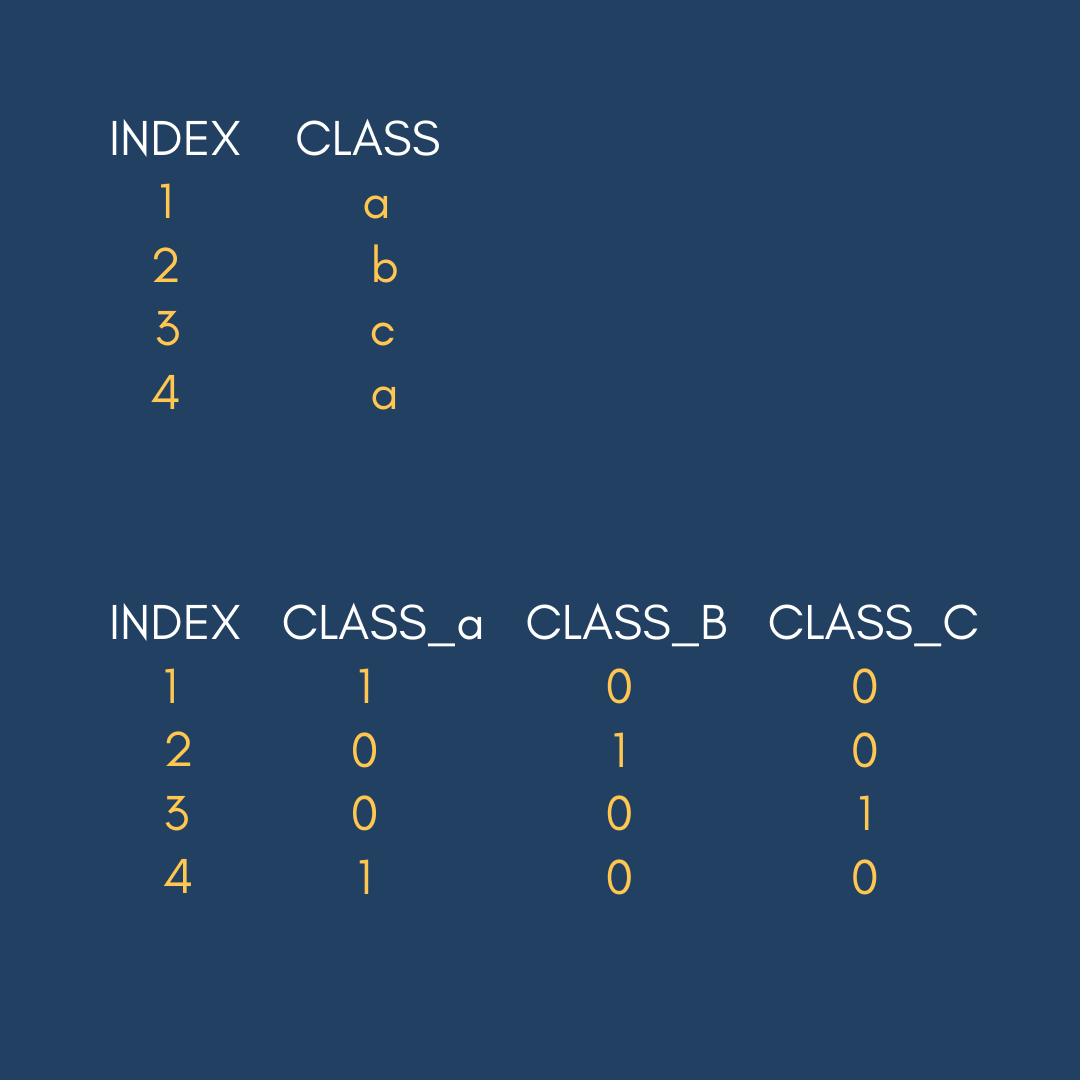

We can do this very easily using Pandas get_dummy method.

In [ ]:
new_df = pd.get_dummies(df, prefix_sep='_', columns=['Embarked'])

In [ ]:
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Alone,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,7.2500,0,0,0,1
1,2,1,1,1,38.0,71.2833,0,1,0,0
2,3,1,3,1,26.0,7.9250,1,0,0,1
3,4,1,1,1,35.0,53.1000,0,0,0,1
4,5,0,3,0,35.0,8.0500,1,0,0,1


Notice how the Embarked column has been channged into three columns.

In [ ]:
## Splitting the tranformed data into test-train data

from sklearn.model_selection import train_test_split
X = new_df.drop('Survived', axis=1)
y = new_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [ ]:
## Fitting GaussianNB model on the  training set

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
## Predicting results for test dataset

y_pred = gnb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7847533632286996